## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Task 1: Data Cleaning

When it comes to data cleaning, a good first step is to quickly get an idea of:
1. How many missing values are present and if they form any noticeable patterns
    - This gives a good starting point for further exploration
2. How the data is distributed
    - This will give us an idea of how to impute missing values

In [2]:
# Define a function to observe basic dataset stats

def observe_data(dataset, stats=True):
    '''
    Shows basic dataset info and statistics if stats=True.
    Shows missing values in dataset.
    '''
    
    from IPython.display import display
    
    if stats == True:
        # Display dataset info and dtypes
        print("\nDataset info and dtypes:")
        display(dataset.info())

        # Display basic dataset stats
        print("\n\nBasic dataset statistics:")
        display(dataset.describe())

    # Quantify missing values
    print("\n\nMissing values quantified:")
    missing_values = pd.DataFrame(dataset.isnull().sum())
    missing_percent = pd.DataFrame(missing_values/len(dataset)*100)
    missing = pd.concat([missing_values, missing_percent], axis=1)
    missing.columns = ['Missing values', '%']
    missing = missing.sort_values(by='Missing values', ascending=False)
    display(missing[missing['Missing values'] > 0])
    
    # Visualize missing values
    print("\n\nMissing values visualized:")
    sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.show()


Dataset info and dtypes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                14 non-null     object 
 1   num_critic_for_reviews     14 non-null     int64  
 2   duration                   11 non-null     float64
 3   DIRECTOR_facebook_likes    12 non-null     object 
 4   actor_3_facebook_likes     14 non-null     int64  
 5   ACTOR_1_facebook_likes     14 non-null     int64  
 6   gross                      14 non-null     int64  
 7   num_voted_users            13 non-null     float64
 8   Cast_Total_facebook_likes  12 non-null     float64
 9   facenumber_in_poster       9 non-null      float64
 10  num_user_for_reviews       14 non-null     int64  
 11  budget                     14 non-null     int64  
 12  title_year                 14 non-null     int64  
 13  ACTOR_2_facebook_likes    

None



Basic dataset statistics:


,num_critic_for_reviews,duration,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
count,14.000000,11.000000,14.000000,14.000000,1.400000e+01,1.300000e+01,12.000000,9.000000,14.000000,1.400000e+01,14.000000,13.000000,14.000000,7.000000
mean,506.142857,150.727273,5866.142857,18206.428571,3.335836e+08,4.621578e+05,44773.583333,2.111111,1620.071429,2.462643e+08,2010.500000,8455.846154,7.171429,2011.142857
std,169.069789,21.679903,8289.592695,13905.214361,1.720674e+08,2.687059e+05,37290.813335,1.269296,866.672102,2.426823e+07,3.632122,8541.019541,0.673028,3.976119
min,302.000000,106.000000,161.000000,451.000000,7.305868e+07,2.122040e+05,1873.000000,1.000000,387.000000,2.000000e+08,2006.000000,393.000000,6.100000,2007.000000
25%,379.250000,141.000000,611.250000,3500.000000,2.002574e+08,2.948100e+05,9983.500000,1.000000,1024.750000,2.390000e+08,2007.250000,632.000000,6.725000,2008.000000
50%,448.000000,151.000000,1000.000000,21000.000000,3.198266e+08,3.830560e+05,47202.500000,2.000000,1240.500000,2.500000e+08,2009.500000,5000.000000,7.200000,2009.000000
75%,635.000000,162.500000,8500.000000,26000.000000,4.418561e+08,4.712200e+05,67064.750000,3.000000,2250.750000,2.560000e+08,2014.250000,11000.000000,7.500000,2015.000000
max,813.000000,183.000000,23000.000000,40000.000000,7.605058e+08,1.144337e+06,106759.000000,4.000000,3054.000000,3.000000e+08,2016.000000,23000.000000,8.500000,2016.000000




Missing values quantified:


,Missing values,%
title_year.1,7,50.000000
facenumber_in_poster,5,35.714286
duration,3,21.428571
DIRECTOR_facebook_likes,2,14.285714
Cast_Total_facebook_likes,2,14.285714
num_voted_users,1,7.142857
ACTOR_2_facebook_likes,1,7.142857




Missing values visualized:


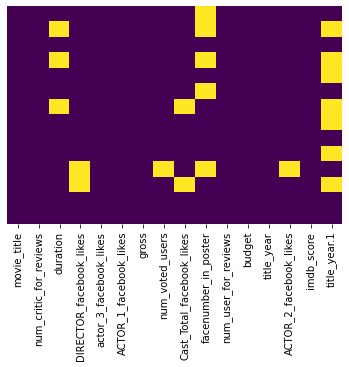

In [3]:
df_movies = pd.read_csv(r"C:/Users/sriha/OneDrive/Desktop/DS/Case Studiess/Qureos - Weber Shandwick/movies_data.csv")

observe_data(df_movies)

### Observations:

1. *The data types for some of the columns may have some potential issues:*
    - "DIRECTOR_facebook_likes" should be an integer but is an object. Why is this?
    - "num_voted_users", "Cast_Total_facebook_likes", "facenumber_in_poster", and "ACTOR_2_facebook_likes" should be whole number integers, but are floats. Why is this?
    - "duration" is the value in number of minutes and can be converted to int. 
    - The column names do not follow a fixed naming convention. This should be fixed to make later stages of the data pipeline easier. 


2. *From the visualization we can see that there are no clear patterns in the missing values of the dataset*


3. *The column "title_year.1" has 50% missing values and may be a repeat of the column "title_year"*

In [4]:
# Look at the dataset
df_movies.head()

,movie_title,num_critic_for_reviews,duration,DIRECTOR_facebook_likes,actor_3_facebook_likes,ACTOR_1_facebook_likes,gross,num_voted_users,Cast_Total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,ACTOR_2_facebook_likes,imdb_score,title_year.1
0,Avatar?ÿ,723,178.0,10,855,1000,760505847,886204.0,4834.0,NaN,3054,237000000,2009,936.0,7.9,2009.0
1,Pirates of the Caribbean: At World's End?ÿ,302,NaN,563,1000,40000,309404152,471220.0,48350.0,NaN,1238,300000000,2007,5000.0,7.1,NaN
2,Spectre?ÿ,602,148.0,20,161,11000,200074175,275868.0,11700.0,1.0,994,245000000,2015,393.0,6.8,2015.0
3,The Dark Knight Rises?ÿ,813,NaN,22000,23000,27000,448130642,1144337.0,106759.0,NaN,2701,250000000,2012,23000.0,8.5,NaN
4,John Carter?ÿ,462,132.0,"""475""",530,640,73058679,212204.0,1873.0,1.0,738,263700000,2012,632.0,6.6,NaN


In [5]:
# Try to identify patterns for the facebook likes columns
df_movies[['DIRECTOR_facebook_likes','ACTOR_1_facebook_likes','ACTOR_2_facebook_likes','actor_3_facebook_likes','Cast_Total_facebook_likes']].head()

,DIRECTOR_facebook_likes,ACTOR_1_facebook_likes,ACTOR_2_facebook_likes,actor_3_facebook_likes,Cast_Total_facebook_likes
0,10,1000,936.0,855,4834.0
1,563,40000,5000.0,1000,48350.0
2,20,11000,393.0,161,11700.0
3,22000,27000,23000.0,23000,106759.0
4,"""475""",640,632.0,530,1873.0



### Next steps:

1. *Take a look at the actual dataset and evaluate how to resolve dtype anomalies and fill in missing values*
    - Note that there is no column (like genre) to groupby. So in this case, we can simply impute the dataset with the median value. 
    - Here, we assume that the values are normally distributed. If not, it would be useful to apply log transformations if we intend to train any predictive models. 


2. *The column "movie_title" has extra characters at the end which can be removed to improve readability*


3. *"DIRECTOR_facebook_likes" has string values and some values may have quotation marks. Remove these and convert to int*


4. *"num_voted_users", "Cast_Total_facebook_likes", and "facenumber_in_poster" are simply floats to be converted to ints for logical consistency. No other modifications needed in this case.*


5. *title_year" and "title_year.1" do appear to be repeats. There are some values that are different, but upon observation, it is prudent to simply remove "title_year.1"* 
    - Note that it is possible a movie has two different release years, for example in different countries. However in this dataset, there is nothing to suggest that this is the case. 
    

6. *Although not strictly beneficial, reording the columns into a more logical format will also improve readability*


### Logic for missing value imputation:

Note: We do not have any other column to group these movies by, so more granular imputation is not possible here. We also assume that these numeric features are normally distributed

1. "facenumber_in_poster": Most, if not all movie posters have headshots of the actors. It is very unlikely for a poster to have no headshots. **Impute the median value.**


2. "duration", "ACTOR_2_facebook_likes", "DIRECTOR_facebook_likes", "num_voted_users": **Impute the median value.**


3. "Cast_Total_facebook_likes": Simply imputing the median here is not logically sound, since actor 1, 2, 3 likes will be a part of cast total. The sum of all other actor likes will logically be closer to the true value of total likes. **Impute the sum of all the actor likes.**

In [6]:
def clean_data(dataset):
    
    # Rename columns to have a standard format: No capitalizations
    dataset.columns = dataset.columns.str.lower()
    
    # Change dtypes of columns
    if dataset['director_facebook_likes'].dtype == 'object':    #For error handling when re-running parts of code
        dataset['director_facebook_likes'] = dataset['director_facebook_likes'].str.replace('"', '')
    
    dataset['director_facebook_likes'] = dataset['director_facebook_likes'].astype('float64') # Convert to float to avoid errors during imputation
    
    # Remove last two special characters from movie title
    dataset["movie_title"] = dataset["movie_title"].str.split('?').str[0]
    
    # Drop "title_year.1"
    if 'title_year.1' in dataset.columns:    #For error handling when re-running parts of code
        dataset.drop('title_year.1', axis=1, inplace=True)
    
    # Drop any duplicated rows, if present
    dataset.drop_duplicates(inplace=True)
    
    # Impute missinig values
    columns_to_impute_median = [
        "actor_2_facebook_likes",
        "duration",
        "director_facebook_likes",
        "facenumber_in_poster",
        "num_voted_users"
    ]
    
    for column in columns_to_impute_median:
        dataset[column] = dataset[column].fillna(dataset[column].median())
        dataset[column] = dataset[column].apply(np.floor)    # For cases where the median is a fraction
        
    dataset['cast_total_facebook_likes'] = dataset['cast_total_facebook_likes'].fillna(dataset['actor_1_facebook_likes'] + dataset['actor_2_facebook_likes'] + dataset['actor_3_facebook_likes']) 

    # Change floats to ints for readability
    for column in dataset.columns:
        if (dataset[column].dtypes == 'float64') and (column != 'imdb_score'):
            dataset[column] = dataset[column].astype('Int64')
            
    # Re-order column names for readability
    columns_reordered = [
        "movie_title", "duration", "title_year", "director_facebook_likes", 
        "actor_1_facebook_likes", "actor_2_facebook_likes", "actor_3_facebook_likes", "cast_total_facebook_likes", 
        "budget", "gross", "facenumber_in_poster",
        "num_critic_for_reviews", "num_user_for_reviews", "num_voted_users", "imdb_score"
    ]
    
    dataset_cleaned = dataset.reindex(columns=columns_reordered)
    
    return dataset_cleaned



Missing values quantified:


,Missing values,%




Missing values visualized:


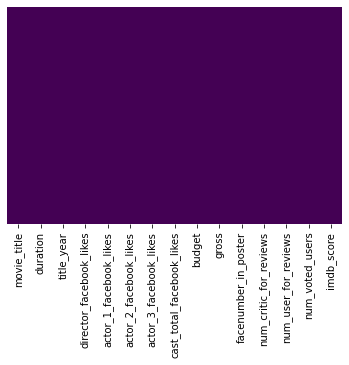

In [7]:
# Call function to clean data and re-observe our dataset
df_movies_cleaned = clean_data(df_movies)
observe_data(df_movies_cleaned, stats=False)

We have successfully dealt with missing values and cleaned the dataset. Now we can export the dataset if needed. 

In [8]:
df_movies_cleaned.head()

,movie_title,duration,title_year,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,budget,gross,facenumber_in_poster,num_critic_for_reviews,num_user_for_reviews,num_voted_users,imdb_score
0,Avatar,178,2009,10,1000,936,855,4834,237000000,760505847,1,723,3054,886204,7.9
1,Pirates of the Caribbean: At World's End,152,2007,563,40000,5000,1000,48350,300000000,309404152,1,302,1238,471220,7.1
2,Spectre,148,2015,20,11000,393,161,11700,245000000,200074175,1,602,994,275868,6.8
3,The Dark Knight Rises,152,2012,22000,27000,23000,23000,106759,250000000,448130642,1,813,2701,1144337,8.5
4,John Carter,132,2012,475,640,632,530,1873,263700000,73058679,1,462,738,212204,6.6


In [9]:
df_movies_cleaned.to_csv(r"C:/Users/sriha/OneDrive/Desktop/DS/Case Studiess/Qureos - Weber Shandwick/Cleaned/movies_data_clean.csv")